# Patient Persistence Classification Model

Step 1: Importing the basic necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Setting the working directory 
os.chdir(r'C:\Users\91962\OneDrive - Kantar\Desktop\Aishwarya Roy Chowdhury')

Step 2: Importing and reading the data

In [3]:
df = pd.read_excel(r'C:\Users\91962\OneDrive - Kantar\Desktop\Aishwarya Roy Chowdhury\Case Study\Data.xlsx')

In [4]:
#Our data has 3424 rows and 69 columns
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [5]:
#Running Summary Statistics for numerical variables
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

Step 3: Data Pre-Processing

In [7]:
#Checking for missing values
#Our data does not have any missing values (Thank God!)
df.isna().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

Persistency_Flag
Non-Persistent    2135
Persistent        1289
dtype: int64


<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

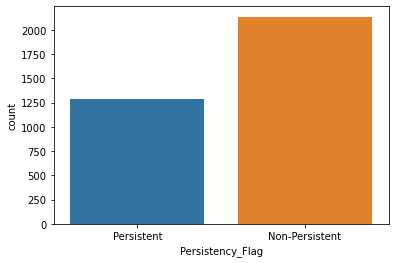

In [8]:
#Checking the distribution of the target variable, i.e., Persistency Flag 
#There are more non-persistent tags compared to persistent

print(df.value_counts('Persistency_Flag'))

import seaborn as sns
sns.countplot(x="Persistency_Flag",data=df)

Step 4: Data Preparation

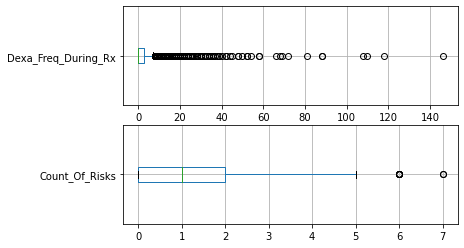

In [9]:
#Using box plot to check if our numerical features are normally distributed
numeric_df=['Dexa_Freq_During_Rx','Count_Of_Risks']
fig, axes = plt.subplots(2, 1)
for i, c in enumerate(numeric_df):
    f = df[[c]].boxplot(ax=axes[i], vert=False)

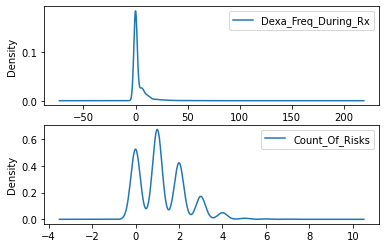

In [10]:
fig, axes = plt.subplots(2, 1)
for i, c in enumerate(numeric_df):
    f = df[[c]].plot(kind='kde',ax=axes[i])

In [11]:
#Both our numerical features have outliers, hence, we have to treat them accordingly
#We use Interquartile Range (IQR) to remove outliers 
#Here, we replace outliers with upper limit value if it exceeds upper limit 
#We replace outliers with lower limit value if it exceeds lower limit 

#Outlier treatment for Dexa_Freq_During_Rx
for x in ['Dexa_Freq_During_Rx']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = min
    df.loc[df[x] > max,x] = max
    
#Outlier treatment for Count_Of_Risks
for x in ['Count_Of_Risks']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = min
    df.loc[df[x] > max,x] = max

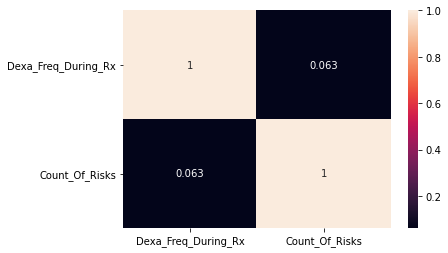

In [12]:
#Checking for correlation between numeric variables and if multicollinearity exists
#Plotting the correlation heatmap
#The numerical features are not correlated, and hence, multicollinearity is not a problem
ax = sns.heatmap(df.corr(), annot=True)

In [13]:
#Now we treat the categorical variables accordingly

# We drop the ptid variable as it is not relevant to our analysis
df.drop(columns='Ptid',inplace=True)

#We extract only the categorical variables
attributelist=[]
for i in df.columns:
    if i not in numeric_df:
        attributelist.append(i)
        
#We check the distribution of categorical variables
for i in attributelist:
    x=df[i].value_counts(normalize=True)*100
    print(i)
    print(x)

Persistency_Flag
Non-Persistent    62.353972
Persistent        37.646028
Name: Persistency_Flag, dtype: float64
Gender
Female    94.334112
Male       5.665888
Name: Gender, dtype: float64
Race
Caucasian           91.939252
Other/Unknown        2.832944
African American     2.774533
Asian                2.453271
Name: Race, dtype: float64
Ethnicity
Not Hispanic    94.48014
Hispanic         2.86215
Unknown          2.65771
Name: Ethnicity, dtype: float64
Region
Midwest          40.391355
South            36.419393
West             14.661215
Northeast         6.775701
Other/Unknown     1.752336
Name: Region, dtype: float64
Age_Bucket
>75      42.026869
65-75    31.717290
55-65    21.407710
<55       4.848131
Name: Age_Bucket, dtype: float64
Ntm_Speciality
GENERAL PRACTITIONER                                              44.830607
RHEUMATOLOGY                                                      17.640187
ENDOCRINOLOGY                                                     13.376168
Unknown  

In [14]:
#We drop those variables having a biased distrubution, having uneven distribution
drop_variables=['Risk_Recurring_Falls','Risk_Immobilization','Risk_Estrogen_Deficiency','Risk_Hysterectomy_Oophorectomy','Risk_Excessive_Thinness',
               'Risk_Low_Calcium_Intake','Risk_Chronic_Liver_Disease','Risk_Untreated_Early_Menopause','Risk_Untreated_Chronic_Hypogonadism','Risk_Untreated_Chronic_Hyperthyroidism',
               'Risk_Rheumatoid_Arthritis','Risk_Osteogenesis_Imperfecta']

df.drop(columns=drop_variables,inplace=True)

In [15]:
#The categorical variable, Ntm_Speciality has too many sub-categories with low frequency of values 
#Hence, we club those sub-categories having < 1% frequency as "Other" 
series = pd.value_counts(df.Ntm_Speciality)
mask = (series/series.sum() * 100).lt(1)
df['Ntm_Speciality'] = np.where(df['Ntm_Speciality'].isin(series[mask].index),'Other', df['Ntm_Speciality'])
print(df.shape)

(3424, 56)


In [16]:
#Finally, we check for duplicates
df.duplicated().sum()

6

In [17]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

In [18]:
#Our final data to be used for model building purpose
#df.to_csv(r'C:\Users\91962\OneDrive - Kantar\Desktop\Aishwarya Roy Chowdhury\Case Study\Final_Data.csv')
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Family_History_Of_Osteoporosis,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0.0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0.0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,Y,N,N,N,N,N,2.0
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,Y,N,N,N,N,1.0
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,Y,N,N,N,N,1.0


Step 5: Basic Exploratory Data Analysis 

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

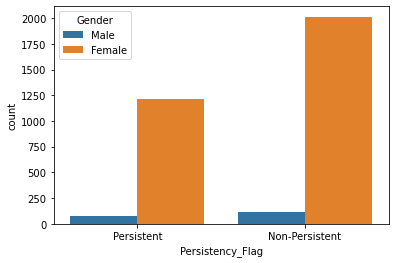

In [19]:
#Understanding how persistent and non-persistent varies across gender
sns.countplot(x="Persistency_Flag",hue='Gender', data=df)

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

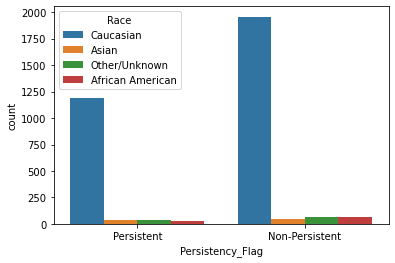

In [20]:
#Understanding how persistent and non-persistent varies across race
sns.countplot(x="Persistency_Flag",hue='Race', data=df)

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

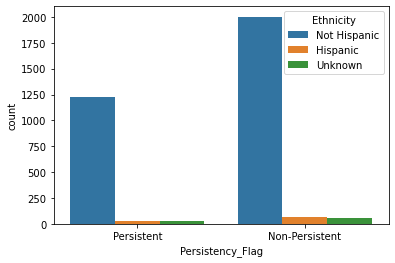

In [21]:
#Understanding how persistent and non-persistent varies across ethnicity
sns.countplot(x="Persistency_Flag",hue='Ethnicity', data=df)

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

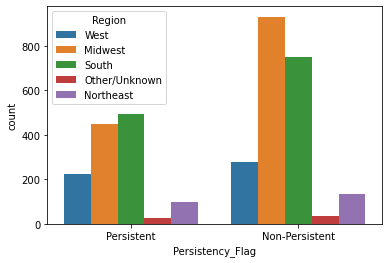

In [22]:
#Understanding how persistent and non-persistent varies across region
sns.countplot(x="Persistency_Flag",hue='Region', data=df)

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

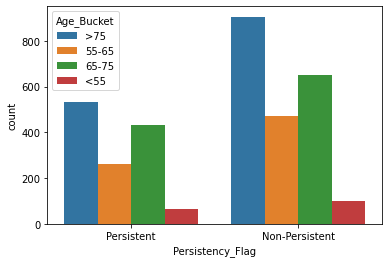

In [23]:
#Understanding how persistent and non-persistent varies across age buckets
sns.countplot(x="Persistency_Flag",hue='Age_Bucket', data=df)

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

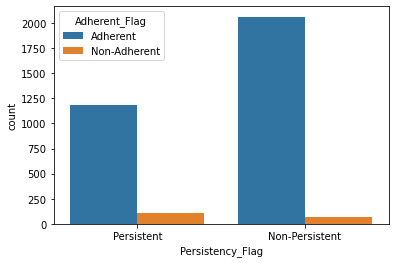

In [24]:
#Understanding how persistent and non-persistent varies across adherent flag
sns.countplot(x="Persistency_Flag",hue='Adherent_Flag', data=df)

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

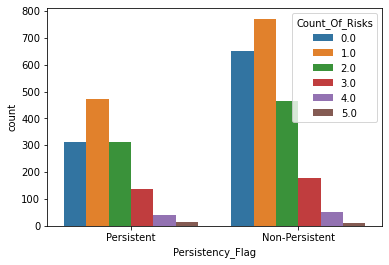

In [25]:
#Understanding how persistent and non-persistent varies across count of risks
sns.countplot(x="Persistency_Flag", hue='Count_Of_Risks', data=df)

Step 5: Label Encoding

In [26]:
#We convert our categorical variables into numerical variables using label encoder
#For our target variable, i.e., Persistency_Flag
X= df.drop(columns='Persistency_Flag')
y = df['Persistency_Flag']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(np.ravel(y))

In [27]:
#For our independent variables
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        #Transforms columns of X specified in self.columns using LabelEncoder().
        #If no columns specified, transforms all columns in X.
        
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    
X_var = []
for i in df.columns:
    if i not in numeric_df:
        if i != 'Persistency_Flag':
            X_var.append(i)
            
#Transform all X variables
X = MultiColumnLabelEncoder(columns=X_var).fit_transform(X)

In [28]:
#Computing feature importance for all variables
#Dexa_Freq_During_Rx & Dexa_During_Rx variables significantly contribute to patients' persistance
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0)
clf.fit(X, y)
feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

Dexa_Freq_During_Rx                                                   0.116122
Dexa_During_Rx                                                        0.079614
Comorb_Long_Term_Current_Drug_Therapy                                 0.046057
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                0.035663
Comorb_Encounter_For_Immunization                                     0.034325
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx       0.030748
Region                                                                0.028637
Ntm_Speciality                                                        0.027039
Count_Of_Risks                                                        0.025895
Age_Bucket                                                            0.025102
Ntm_Speciality_Bucket                                                 0.018852
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified                  0.017717
Change_T_Score                                      

Step 6: Building the Model

In [29]:
#Splitting our data for training and testing
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=19)

In [30]:
#Importing the important libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings

In [31]:
models = []
models.append(('Random Forest Clas.', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Clas.', DecisionTreeClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('Logistic Reg.', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('SVC', SVC()))

In [32]:
#Checking the accuracy of different models to understand which one we would be using in our prediction
#Random Forest Classifier has the highest score and hence, we will be using it for model training and testing purposes
warnings.filterwarnings('ignore')
model_names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
    scores.append(score)
    model_names.append(name)
    print(f"Mean of the {name} model scores : {score.mean()}")

Mean of the Random Forest Clas. model scores : 0.8016463446005042
Mean of the KNN model scores : 0.7735521599698171
Mean of the Decision Tree Clas. model scores : 0.7182641354118433
Mean of the GBC model scores : 0.8051534015880366
Mean of the Logistic Reg. model scores : 0.8042702063075577
Mean of the XGB model scores : 0.785546466361407
Mean of the SVC model scores : 0.7987163656942944


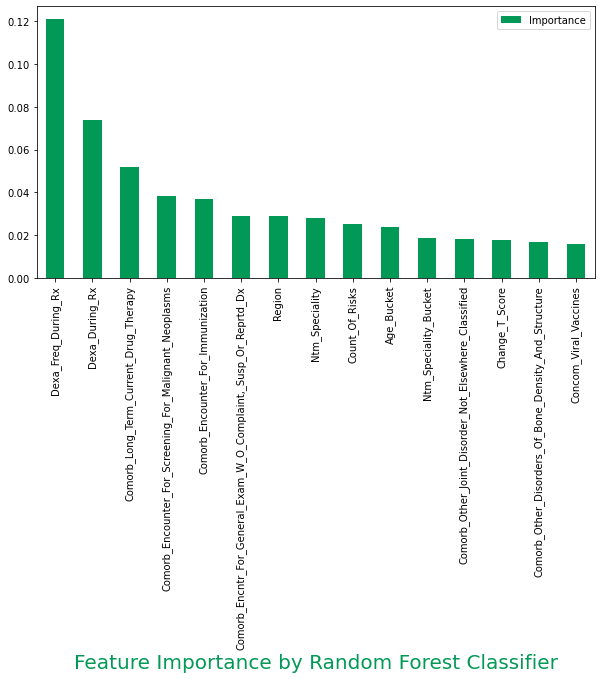

In [33]:
#Checking feature importance to filter out those features which are not relevant to our model
feature_importance_ = pd.DataFrame({'Importance' : RandomForestClassifier().fit(X, y).feature_importances_}, index = X.columns)

feature_importance_.sort_values(by = 'Importance', ascending = False, axis = 0)[:15].plot(kind = 'bar', color = '#019955', figsize = (10, 5))
plt.xlabel("Feature Importance by Random Forest Classifier", color = "#019955", fontdict= {"fontsize" : 20});

In [34]:
#Considering only the top 15 features for prediction
X_train_new_ = train_X[['Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Comorb_Long_Term_Current_Drug_Therapy', 
                       
                       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization',
                        
                       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx' ,'Region', 'Ntm_Speciality',
                        
                        'Count_Of_Risks', 'Age_Bucket', 'Concom_Systemic_Corticosteroids_Plain', 
                        
                        'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Ntm_Speciality_Bucket', 'Tscore_Bucket_During_Rx',
                        
                        'Change_T_Score']]


X_test_new_ = test_X[['Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Comorb_Long_Term_Current_Drug_Therapy', 
                       
                       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization',
                        
                       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx' ,'Region', 'Ntm_Speciality',
                        
                        'Count_Of_Risks', 'Age_Bucket', 'Concom_Systemic_Corticosteroids_Plain', 
                        
                        'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Ntm_Speciality_Bucket', 'Tscore_Bucket_During_Rx',
                        
                        'Change_T_Score']]

In [35]:
#Standardizing the data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train_new_)
X_test_sc = sc.transform(X_test_new_)

In [36]:
#Using grid search to fine-tune the model parametres
params_grid = {'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 4, 6, 8, 10], 'n_estimators' : [300, 400, 500],
              'min_samples_split' : [2, 4, 6, 8], 'min_samples_leaf' : [2, 3, 5, 7]}

gscv_rf = GridSearchCV(RandomForestClassifier(), params_grid, cv = 3, scoring = 'f1')

gscv_rf.fit(X_train_sc, train_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [300, 400, 500]},
             scoring='f1')

In [37]:
#Finding the best values for our parametres 
gscv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [38]:
#Using the best values for our RF parametres
#The accuracy scores for both our training and test data are similar to each other and hence, the model is neither an underfit nor an overfit
rf_gscv =RandomForestClassifier(n_estimators = 400, criterion = 'gini', max_depth = 4, min_samples_split =8, min_samples_leaf = 2)
rf_gscv.fit(X_train_sc, train_y)

y_pred_gsvc = rf_gscv.predict(X_test_sc)
y_pred_gsvc_train = rf_gscv.predict(X_train_sc)

rf_gscv_as = metrics.accuracy_score(test_y, y_pred_gsvc)
rf_gscv_train_as = metrics.accuracy_score(train_y, y_pred_gsvc_train)

print(f"Accuracy score for test data : {rf_gscv_as}")
print(f"Accuracy score for train data : {rf_gscv_train_as}")

Accuracy score for test data : 0.7660818713450293
Accuracy score for train data : 0.8057790782735919


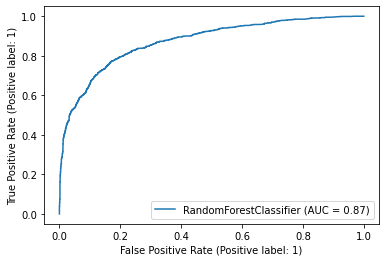

In [39]:
#Plotting the AUC
metrics.plot_roc_curve(rf_gscv, X_train_sc, train_y)

Step 7: Model Validation/Evaluation

1. Training Data

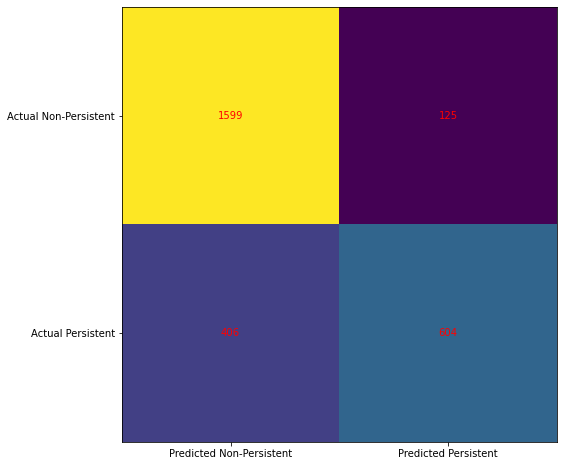

In [41]:
#We now construct the Confusion Matrix to validate our model on the train data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y, rf_gscv.predict(X_train_sc))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Non-Persistent', 'Predicted Persistent'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Non-Persistent', 'Actual Persistent'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [43]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(train_y, rf_gscv.predict(X_train_sc)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1724
           1       0.83      0.60      0.69      1010

    accuracy                           0.81      2734
   macro avg       0.81      0.76      0.78      2734
weighted avg       0.81      0.81      0.80      2734



In [44]:
#Checking Accuracy for each class
print(f"Accuracy for Non-Persistent : {1595/(1595+129)}")
print(f"Accuracy for Persistent : {609/(401+609)}")

Accuracy for Non-Persistent : 0.9251740139211136
Accuracy for Persistent : 0.602970297029703


In [45]:
#Generating the F1 Score
from sklearn.metrics import f1_score
f1_score(train_y, rf_gscv.predict(X_train_sc))

0.6946520989074181

2. Test Data 

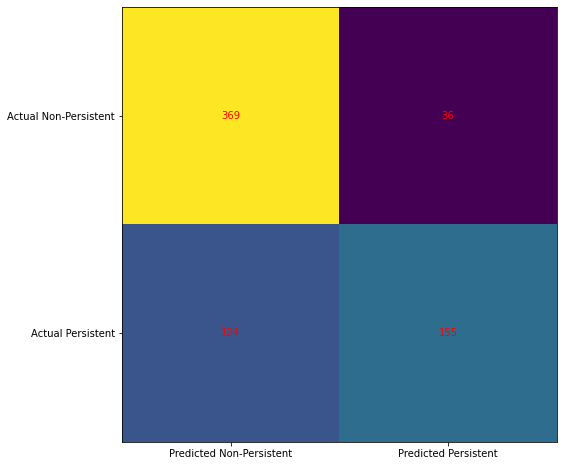

In [46]:
#We now construct the Confusion Matrix to validate our model on the test data
cm = confusion_matrix(test_y, rf_gscv.predict(X_test_sc))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Non-Persistent', 'Predicted Persistent'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Non-Persistent', 'Actual Persistent'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [47]:
#Classification Report
print(classification_report(test_y, rf_gscv.predict(X_test_sc)))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       405
           1       0.81      0.56      0.66       279

    accuracy                           0.77       684
   macro avg       0.78      0.73      0.74       684
weighted avg       0.77      0.77      0.76       684



In [48]:
#Checking Accuracy for each class
print(f"Accuracy for Non-Persistent : {368/(368+37)}")
print(f"Accuracy for Persistent : {159/(120+159)}")

Accuracy for Non-Persistent : 0.908641975308642
Accuracy for Persistent : 0.5698924731182796


In [49]:
#Generating the F1 Score
from sklearn.metrics import f1_score
f1_score(test_y, rf_gscv.predict(X_test_sc))

0.6595744680851064